In [1]:
# from notion import query_notion, create_df_from_notion
from graph import create_db, define_schemas, load_data

import os
from notion_client import Client
from dotenv import load_dotenv
from pprint import pprint
from helpers import normalize_name
import pandas as pd

In [2]:
load_dotenv()


databases = {
    "Recipe" : {
        "ID" : os.getenv("RECIPE_ID"),
        "token": os.getenv("RECIPE_TOKEN")

    },
    "Ingredient" : {
        "ID" : os.getenv("INGREDIENT_ID") ,
        "token": os.getenv("INGREDIENT_TOKEN")

    }
}

In [6]:
notion_rec = Client(auth=databases['Recipe']['token'])
# notion_rec = Client(auth="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")
notion_ing = Client(auth=databases['Ingredient']['token'])

In [7]:
recipe_response = notion_rec.databases.query(
        database_id=databases['Recipe']['ID'],
        )

ing_response = notion_ing.databases.query(
        database_id=databases['Ingredient']['ID'],
        # filter={
        #     "and":[
        #         {
        #             "property": "Frequency",
        #             "select": {
        #                 "equals": "Ingredient"
        #             }},
        #         {
        #             "property": "Checkbox",
        #             "checkbox" : {
        #                 "equals" : True
        #             }}]  
        # }
        )

In [9]:
# parse notion ingredient response 

df = pd.DataFrame([
    {
        "id": val["id"],
        "ingredient_name": val["properties"]["Name"]["title"][0]["plain_text"]
            if val["properties"]["Name"]["title"] else None,
        "aisle": val["properties"]["Aisle"]["select"]["name"]
            if val["properties"]["Aisle"]["select"] else None,
        "recipe_ids": [r["id"] for r in val["properties"]["Recipes"]["relation"]],
    }
    for val in ing_response["results"]
])

df


,id,ingredient_name,aisle,recipe_ids
0,14125ce7-5dc9-8083-8c35-d4c289a0f95f,tissues,Packaged,[]
1,13b25ce7-5dc9-808b-9418-e73559c76308,parsley,Produce,[]
2,13b25ce7-5dc9-80ea-b251-eb52002cf0fb,ginger,None,[12d25ce7-5dc9-80e4-bafd-d114b605c4cb]
3,13b25ce7-5dc9-809e-82b6-c7263ec92098,cottage cheese,Dairy,[]
4,13325ce7-5dc9-8070-a009-e5b022b158a2,sparkling water,Packaged,[]
...,...,...,...,...
93,42f92a21-fd74-4f27-b72b-44567f3067e8,cilantro,Produce,"[0c173870-2d13-4391-b44d-1c7058d82890, d7947fa..."
94,99bc8f72-6aef-4675-b656-d67539ef84c6,Orzo,Packaged,[80e2a004-2a40-48df-8737-4914df14fe5e]
95,4e876e35-7fe1-4b8b-8c90-983db8ba2b8d,Salmon,Protein,[14fc9068-2925-43d0-b903-444063d357d0]
96,bd6270a7-590c-4c3b-b307-9c411bfa9c2a,Rice,Home,"[14fc9068-2925-43d0-b903-444063d357d0, 0c17387..."


In [10]:
ingredients = df.explode("recipe_ids")

In [11]:
# parse notion recipe response 

recipes = pd.DataFrame([
    {
        "id": val["id"],
        "recipe_name": val["properties"]["Name"]["title"][0]["plain_text"]
            if val["properties"]["Name"]["title"] else None,
        "type": val["properties"]["Type"]["select"]["name"]
            if val["properties"]["Type"]["select"] else None,
    }
    for val in recipe_response["results"]
])

recipes



,id,recipe_name,type
0,1f625ce7-5dc9-8044-9aed-d03f9c845273,avo toast,None
1,1f625ce7-5dc9-802d-b9fe-e75ff2a4b3bb,bagel w/ lox cream cheese,breakfast
2,1f625ce7-5dc9-8099-ac92-ce6a4b33356c,chicken salad,lunch
3,1f625ce7-5dc9-80c5-97af-d92184610f47,celery salad,Salad
4,1f625ce7-5dc9-80da-ba5b-d04202ce40cf,greek no lettuce salad,Salad
5,19d25ce7-5dc9-8005-87f5-f5cf96133a65,Asian Ground Beef Bowl,Bowl
6,19d25ce7-5dc9-80e6-917f-d5787675c147,BBQ Chicken Bowls,Bowl
7,13325ce7-5dc9-8025-8153-fa5c65cfb08d,steak quesadilla,Wrap
8,12d25ce7-5dc9-80e4-bafd-d114b605c4cb,green garlic ginger chicken lime soup,Soup
9,12525ce7-5dc9-80b6-9cdf-fea02a27fd78,turkey sandwich,lunch


In [15]:
import kuzu 

db = kuzu.Database()
conn = kuzu.Connection(db)

conn.execute("CREATE NODE TABLE Recipe(id STRING, name STRING, type STRING, PRIMARY KEY (id))")
# conn.execute("CREATE NODE TABLE Recipe(id STRING, name STRING, type STRING, vibe STRING, servings INT, cookTime STRING, PRIMARY KEY (id))")
conn.execute("CREATE NODE TABLE Ingredient(id STRING, name STRING, location STRING, PRIMARY KEY (id))")
conn.execute("CREATE REL TABLE Contains(FROM Recipe TO Ingredient)")
conn.execute("CREATE REL TABLE UsedIn(FROM Ingredient TO Recipe)")

In [21]:
# from graph import load_data

def load_data(conn, table, df):

    query = f"COPY {table} FROM df"
    conn.execute(
        query
    )

# create recipe table
# load_data(conn, "Recipe", recipes)

# # # create ingredients table
# ingredient_nodes = ingredients[['id', 'ingredient_name', 'aisle']].drop_duplicates()
# load_data(conn, "Ingredient", ingredient_nodes)

# # create relationships table

# print(ingredients)
contains = ingredients[["recipe_ids", 'id']].dropna()
# used_in = ingredients[['ingredient_name', "recipe_name"]]


load_data(conn, "Contains", contains)
# # load_data(conn, "UsedIn", used_in)



In [24]:
conn.execute(
    """
    MATCH (n:Ingredient)<-[]-(m:Recipe)
    Return n.name, m.name
    """
).get_as_df()

,n.name,m.name
0,ginger,green garlic ginger chicken lime soup
1,tortillas,Buffalo Chicken Wraps
2,tortillas,Taco Bowls
3,dijon mustard,Caesar Salad
4,dijon mustard,italian bean salad
...,...,...
144,Rice,BBQ Chicken Bowls
145,Rice,Asian Ground Beef Bowl
146,Kimchi,Short Ribs Asian Bowls
147,Kimchi,Korean Chicken Sandwiches


In [48]:
# this is how i get the properties

# recipe_response['results'][0]['properties']

# ['results'][0]['properties'][<property_name>][<property_type>]

ing_response['results'][0]['properties']

# ing_response['results'][0]['properties']['Name']['title'][0]['plain_text']

{'Checkbox': {'id': 'C%60oR', 'type': 'checkbox', 'checkbox': True},
 'Recipes': {'id': 'Cu%5Eh',
  'type': 'relation',
  'relation': [{'id': '1f625ce7-5dc9-802d-b9fe-e75ff2a4b3bb'}],
  'has_more': False},
 'Qty': {'id': 'NgAC', 'type': 'number', 'number': None},
 'Tags': {'id': 'RSHU',
  'type': 'multi_select',
  'multi_select': [{'id': '8592a483-1091-48b0-bc5b-11093afcb9e5',
    'name': 'Breakfast',
    'color': 'default'}]},
 'Aisle': {'id': 'Tm%3ED',
  'type': 'select',
  'select': {'id': '60b09800-af67-48f0-83dc-adec61fd0ce6',
   'name': 'Bread',
   'color': 'orange'}},
 'Frequency': {'id': '%7D%3Aze',
  'type': 'select',
  'select': {'id': 'ezao', 'name': 'Ingredient', 'color': 'brown'}},
 'Name': {'id': 'title',
  'type': 'title',
  'title': [{'type': 'text',
    'text': {'content': 'bagel', 'link': None},
    'annotations': {'bold': False,
     'italic': False,
     'strikethrough': False,
     'underline': False,
     'code': False,
     'color': 'default'},
    'plain_text': 

In [43]:
ing_response['results'][0]['properties']['Aisle']['select']['name']

'Bread'

In [53]:
ing_response['results']

[{'object': 'page',
  'id': 'ce92fd15-c365-41a7-82d4-652ec7fddb2d',
  'created_time': '2024-09-15T13:34:00.000Z',
  'last_edited_time': '2025-05-21T21:42:00.000Z',
  'created_by': {'object': 'user',
   'id': '8b6de86e-73d5-48ca-bd18-b35273d04cec'},
  'last_edited_by': {'object': 'user',
   'id': '8b6de86e-73d5-48ca-bd18-b35273d04cec'},
  'cover': None,
  'icon': None,
  'parent': {'type': 'database_id',
   'database_id': '28dd1b83-d36e-431c-a848-48a93f998126'},
  'archived': False,
  'in_trash': False,
  'properties': {'Checkbox': {'id': 'C%60oR',
    'type': 'checkbox',
    'checkbox': True},
   'Recipes': {'id': 'Cu%5Eh',
    'type': 'relation',
    'relation': [{'id': '1f625ce7-5dc9-802d-b9fe-e75ff2a4b3bb'}],
    'has_more': False},
   'Qty': {'id': 'NgAC', 'type': 'number', 'number': None},
   'Tags': {'id': 'RSHU',
    'type': 'multi_select',
    'multi_select': [{'id': '8592a483-1091-48b0-bc5b-11093afcb9e5',
      'name': 'Breakfast',
      'color': 'default'}]},
   'Aisle': {'id

In [45]:
recipe_response['results']

{'object': 'list',
 'results': [{'object': 'page',
   'id': '1f625ce7-5dc9-8044-9aed-d03f9c845273',
   'created_time': '2025-05-17T12:28:00.000Z',
   'last_edited_time': '2025-05-17T12:29:00.000Z',
   'created_by': {'object': 'user',
    'id': '8b6de86e-73d5-48ca-bd18-b35273d04cec'},
   'last_edited_by': {'object': 'user',
    'id': '8b6de86e-73d5-48ca-bd18-b35273d04cec'},
   'cover': None,
   'icon': None,
   'parent': {'type': 'database_id',
    'database_id': 'a1af207e-8967-4486-be81-08fc3183168f'},
   'archived': False,
   'in_trash': False,
   'properties': {'Type': {'id': 'R%3F%5C%7C',
     'type': 'select',
     'select': None},
    'Servings': {'id': 'ZE%5CQ', 'type': 'number', 'number': None},
    'Meal': {'id': 'bt%3Dm', 'type': 'multi_select', 'multi_select': []},
    'Vibe': {'id': 'c%3Baj', 'type': 'rich_text', 'rich_text': []},
    'Cook Time': {'id': 'je%3AP', 'type': 'rich_text', 'rich_text': []},
    'Date': {'id': 'lQ%5Cb', 'type': 'date', 'date': None},
    'Name': {

In [1]:
import networkx as nx

from notion import pull_from_notion

conn = pull_from_notion()

Connected to Notion: Recipe
Connected to Notion: Ingredient


In [34]:
response = conn.execute(
        """
        MATCH (ingredient)-[r]->(recipe)
        RETURN *
        """
    )

# df = response.get_as_df()
# df
# test['r'][1]
G = response.get_as_networkx(directed=True)
# while response.has_next():
#     print(response.get_next())

# nx.draw(G,with_labels=0)

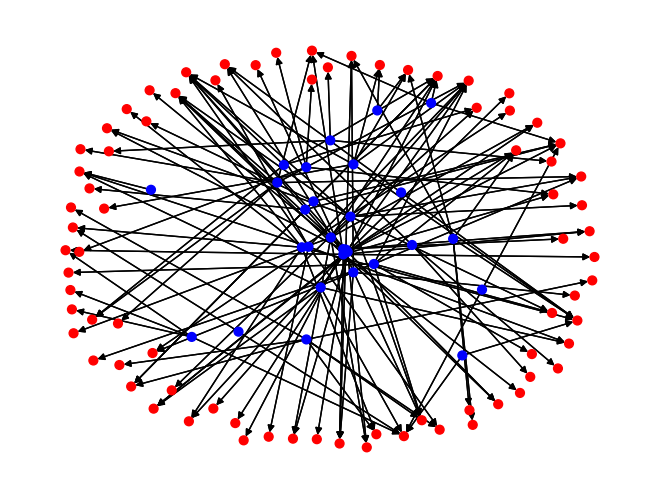

In [5]:
colors = ['red' if G.nodes[node]['_label'] == 'Ingredient' else 'blue' for node in list(G.nodes())]
nx.draw_spring(G, node_color=colors, node_size=40)

In [35]:
# ! pip install yfiles-jupyter-graphs
from yfiles_jupyter_graphs import GraphWidget


from typing import Union, Any

def custom_node_color_mapping(node: dict[str, Any]):
    """let the color be orange or blue if the index is even or odd respectively"""
    return ("#eb4934" if node['properties']['_label'] == "Recipe" else "#2456d4")

w = GraphWidget(graph=G)
w.set_sidebar(enabled=False)
w.set_node_color_mapping(custom_node_color_mapping)
display(w)

GraphWidget(layout=Layout(height='800px', width='100%'))

In [36]:
from graph import get_similar_recipes

get_similar_recipes(conn, ['Salmon Bowl'])

,recipe,sharedIngredientCount
0,Short Ribs Asian Bowls,3
1,Asian Ground Beef Bowl,2
2,Quinoa,1
3,Taco Bowls,1
4,Korean Chicken Sandwiches,1
5,greek no lettuce salad,1
6,celery salad,1
7,BBQ Chicken Bowls,1
